In [42]:
from igraph import *
import numpy as np
import networkx as nx
import igraph as ig
import cairocffi
import matplotlib.pyplot as plt

#### TASK 1

In [ ]:
# construct the graph with the given adjacency matrix

In [43]:
# using adjacency matrix :
alphabit = {
    'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3, 'e' : 4, 'f' : 5, 'g' : 6, 'h' : 7
}

adj2alph_map = [
    ('a', 'h', 8), 
    ('b', 'a', 3),
    ('c', 'a', 5), ('c', 'd', 5), ('c', 'e', 1),
    ('d', 'c', 6), ('d', 'f', 1),
    ('e', 'b', 6), ('e', 'c', 2),
    ('g', 'a', 7), ('g', 'b', 4), ('g', 'e', 8), ('g', 'h', 3),
    ('h', 'b', 3), ('h', 'f', 9),
]

adjacency_matrix = np.zeros(shape=(len(alphabit), len(alphabit)), dtype=int)

# create graph
for v1, v2, weight in adj2alph_map:
    adjacency_matrix[alphabit[v1], alphabit[v2]] = weight
    
g = ig.Graph.Adjacency((adjacency_matrix > 0).tolist())
g.vs['names'] = [key for key in alphabit.keys()]
g.es['weight'] = adjacency_matrix[adjacency_matrix.nonzero()]

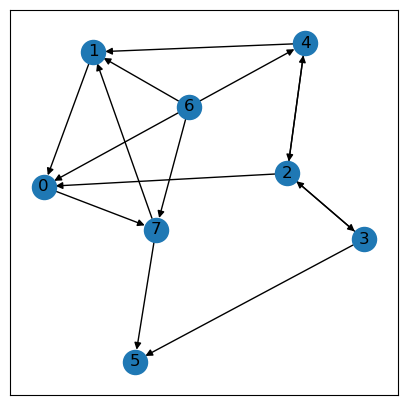

In [46]:
G = nx.DiGraph(adjacency_matrix)
  
plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

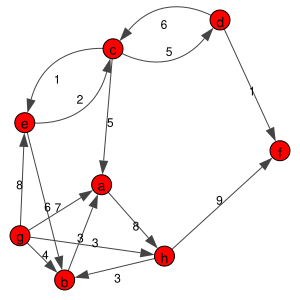

<Figure size 200x200 with 0 Axes>

In [47]:
# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(g,
        vertex_size=20,
        vertex_label=g.vs['names'],
        edge_label=g.es['weight'],
        bbox=(300, 300)
        )

In [447]:
# find diameter, radius, center, peripheral vertices of correspond graph

# diameter - d(G) = max d(u, v) 
diameter = g.diameter()

# radius - r(G) = min d(u, v)
radius = g.radius()

# center - v: r(v) == r(G)
centers = list( filter( None,
    [name if int(vertex.eccentricity()) == radius else None 
     for vertex, name in zip(g.vs, g.vs['names'])] ) )

# peripheral vertices
per_vs = list( filter( None,
    [name if int(vertex.eccentricity()) == diameter else None 
     for vertex, name in zip(g.vs, g.vs['names'])] ) )

# adjacency list
adj_list = {}
for vx, vxs in zip(alphabit.keys(), g.get_adjlist()):
    adj_list[vx] = vxs
adj_list_df = pd.DataFrame(adj_list.items())
adj_list_df.to_csv('adj_list.csv')

# edge list
edge_list = g.get_edge_dataframe()
edge_list.to_csv('edge_list.csv')

# vertex list
vertex_list = g.get_vertex_dataframe()
vertex_list.to_csv('vertex_list.csv')

# incidence matrix
inc_matrix_df = pd.DataFrame(sparse.lil_matrix(nx.incidence_matrix(G)).toarray(), dtype=int)
inc_matrix_df.to_csv('inc_matrix_df.csv')

# vertex degrees list
vx_degrees = pd.DataFrame(G.degree, columns=['vertex', 'degree'])
vx_degrees.to_csv('vx_degrees.csv')

#### TASK 2

In [483]:
# Find graph articulation points and bridges
# plot and point out the objects

print(f'A set of articulation points: {g.articulation_points()}')
print(f'A set of bridhes: {g.bridges()}')

# => required items are absent, nothiing to plot (╯°□°）╯︵ ┻━┻

A set of articulation points: []
A set of bridhes: []


#### TASK 3

In [ ]:
# plot the graph given the hist : [0, 2, 10] of degrees 0, 1, 2

In [221]:
from random import sample
from copy import deepcopy

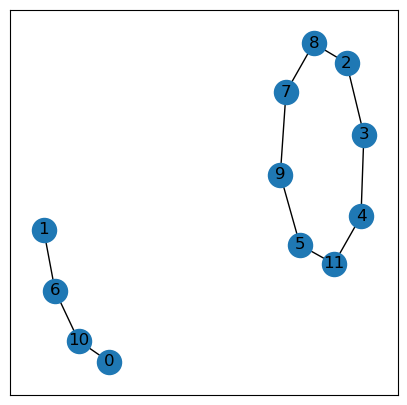

In [281]:
# you're welcome to play with built-in randomizer
# P.S. self implemented algorithms were less stable (unstable at all)
# but more elegant and original by graph construction
# nevertheless the former was used because i couldn't fix my algorithm (>ლ)

hist = {0 : 0, 1 : 2, 2 : 10}
degree_sequence = []
for key, num in hist.items():
    for i in range(num):
        degree_sequence.append(key)
        
degree_sequence = sample(degree_sequence, len(degree_sequence))
G = nx.configuration_model(degree_sequence)

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

#### TASK 4

In [755]:
from itertools import product

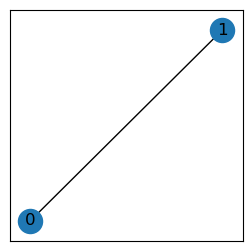

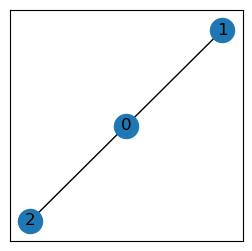

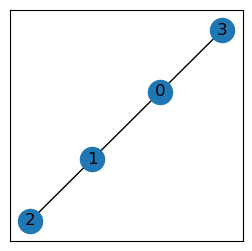

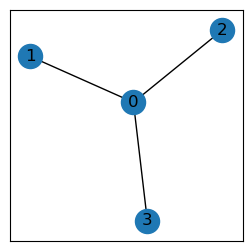

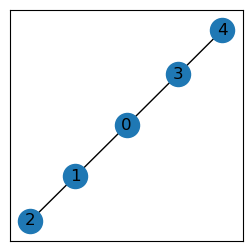

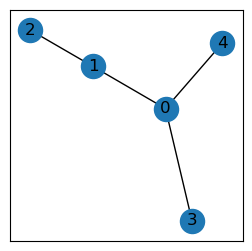

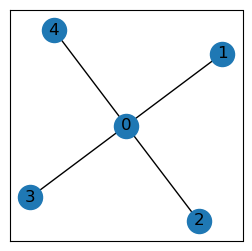

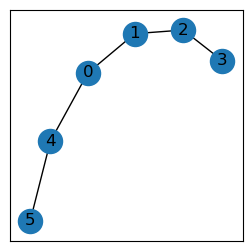

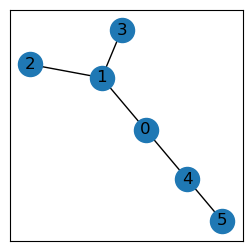

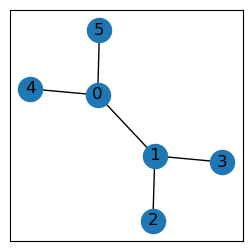

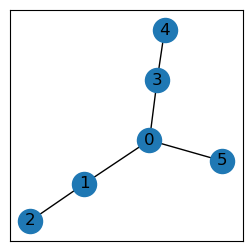

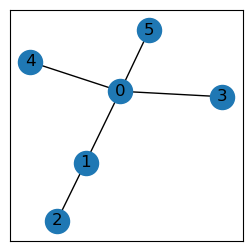

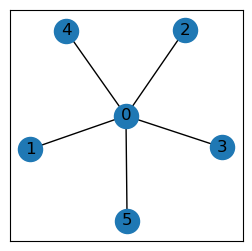

In [31]:
# construct all nonisomorhic trees with 6 or less nodes

G = nx.DiGraph()
nodes = [i+2 for i in range(5)]

for node in nodes:
    
    for tree in nx.nonisomorphic_trees(node, ):
        plt.figure(figsize =(3, 3))
        nx.draw_networkx(tree, with_labels = True)
    

#### TASK 5

In [183]:
# CALCULATE THE PROBABILITY THAT THERE IS A TRIANGLE IN A GRAPH 
# OF 5 NODES AND 6 EDGES

In [185]:
from itertools import combinations, product

In [211]:
# the most straightfull dumb approach -> calculate all combinations off grapgh
# with 5 nodes and 6 edges, calculate all combinations where a triangle is present
# calculate relation: | graphs that contain any triangle | / | all graphs |

nodes_num = 5
nodes = [n for n in range(nodes_num)]
all_possible_edges_combinations = list(combinations(product(nodes, nodes), 6))

counter = 0
for combination in all_possible_edges_combinations:
    random_graph = Graph(edges=combination)
    random_graph.vs['names'] = nodes
    if random_graph.list_triangles():
        counter += 1

print(f'Concrete dumb probability calculus: P[graph has triange] = {counter/len(all_possible_edges_combinations):.3f}')

Concrete dumb probability calculus: P[graph has triange] = 0.465


#### TASK 6

In [ ]:
# FIND ALL SPANNING TREES OF THE GRAPH

In [64]:
from igraph import Graph

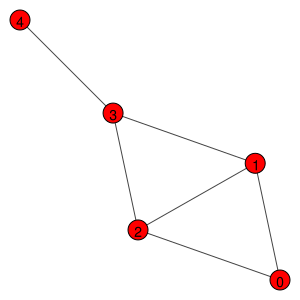

<Figure size 200x200 with 0 Axes>

In [102]:
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)]
nodes = 5

Gi = Graph.from_networkx(G)
Gi.vs['names'] = [node for node in range(nodes)]
    
# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(Gi,
        vertex_size=20,
        vertex_label=Gi.vs['names'],
        #edge_label=G.es['weight'],
        bbox=(300, 300)
        )

In [114]:
from itertools import combinations

In [157]:
# check all possible combinations off subgraphs with nodes_num - 1 edges
# that is a condition for a tree

nodes_num = 5
list_of_trees = []

for combination in combinations(Gi.get_edgelist(), nodes_num-1):
    #print(combination)
    maybe_tree = Graph(edges=combination)
    maybe_tree.vs['names'] = Gi.vs['names']
    
    if maybe_tree.is_tree() and len(maybe_tree.get_vertex_dataframe().index)==nodes_num:
        list_of_trees.append(maybe_tree)
print(len(list_of_trees))

8


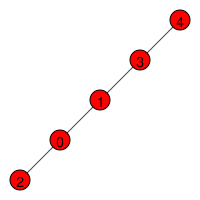

In [174]:
ig.plot(list_of_trees[0],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

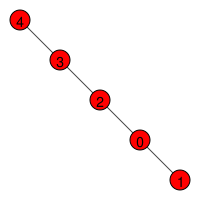

In [175]:
ig.plot(list_of_trees[1],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

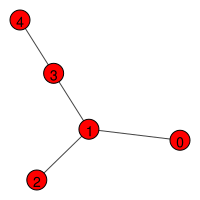

In [176]:
ig.plot(list_of_trees[2],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

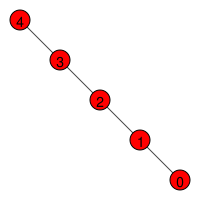

In [177]:
ig.plot(list_of_trees[3],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

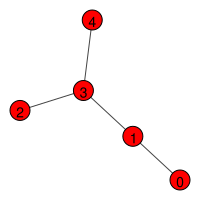

In [178]:
ig.plot(list_of_trees[4],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

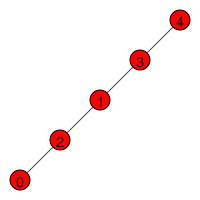

In [179]:
ig.plot(list_of_trees[5],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

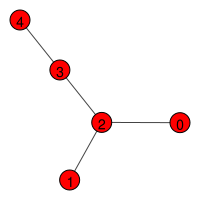

In [180]:
ig.plot(list_of_trees[6],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )

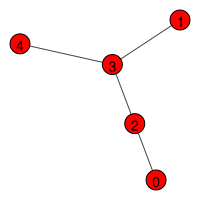

In [181]:
ig.plot(list_of_trees[7],
    vertex_size=20,
    vertex_label=maybe_tree.vs['names'],
    bbox=(200, 200)
    )